# Add Libraries

In [1]:
import os
import time
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams.update({
    'font.size': 8,          # Default font size
    'axes.titlesize': 10,    # Title font size
    'axes.labelsize': 9,     # Axis labels font size
    'xtick.labelsize': 8,    # X-axis tick labels font size
    'ytick.labelsize': 8,    # Y-axis tick labels font size
    'legend.fontsize': 8,    # Legend font size
    'figure.titlesize': 10   # Figure title font size
})
plt.rcParams['font.family'] = 'sans-serif'
from matplotlib.lines import Line2D
import matplotlib.lines as mlines
from matplotlib.ticker import FuncFormatter

import numpy as np
import seaborn as sns
from core import core_global as core
from core.spike_monitor import SpikeMonitor
from core.voltage_monitor import VoltageMonitor
from core.weight_matrix_monitor import WeightMatrixMonitor
from layers.rewiring_connection import RewiringConnection
from models.poisson_pattern_group import PoissonPatternGroup
from utils import utils as utils
from models.mc_lif_group import McLifGroup

# Set the model Parameters

In [3]:
assembly_number = 9
assembly_size = 30
CA3_size = assembly_number*assembly_size
num_branches = 3
cell_num = 100
AcDcell_num = int(cell_num/2)

# Membrane Potential Plots

## Exploration Phase

### Set the Result folder address

In [9]:
exp_name = 'rewiring_ex1'
exp_aspect = 'wake_state_check'
simulation_date = "241119_091059"
trial_number = 0
sim_date = f"{simulation_date}/{trial_number}"
time_length = 1000
cuttime = 995
### choose two cells to plot ( preferebly one from AcD and one from nonAcD group) 
cell_ind_list=[0,1]

FileNotFoundError: [Errno 2] No such file or directory: 'results/rewiring_ex1/wake_state_check/241119_091059/0/data/input.0.ras'

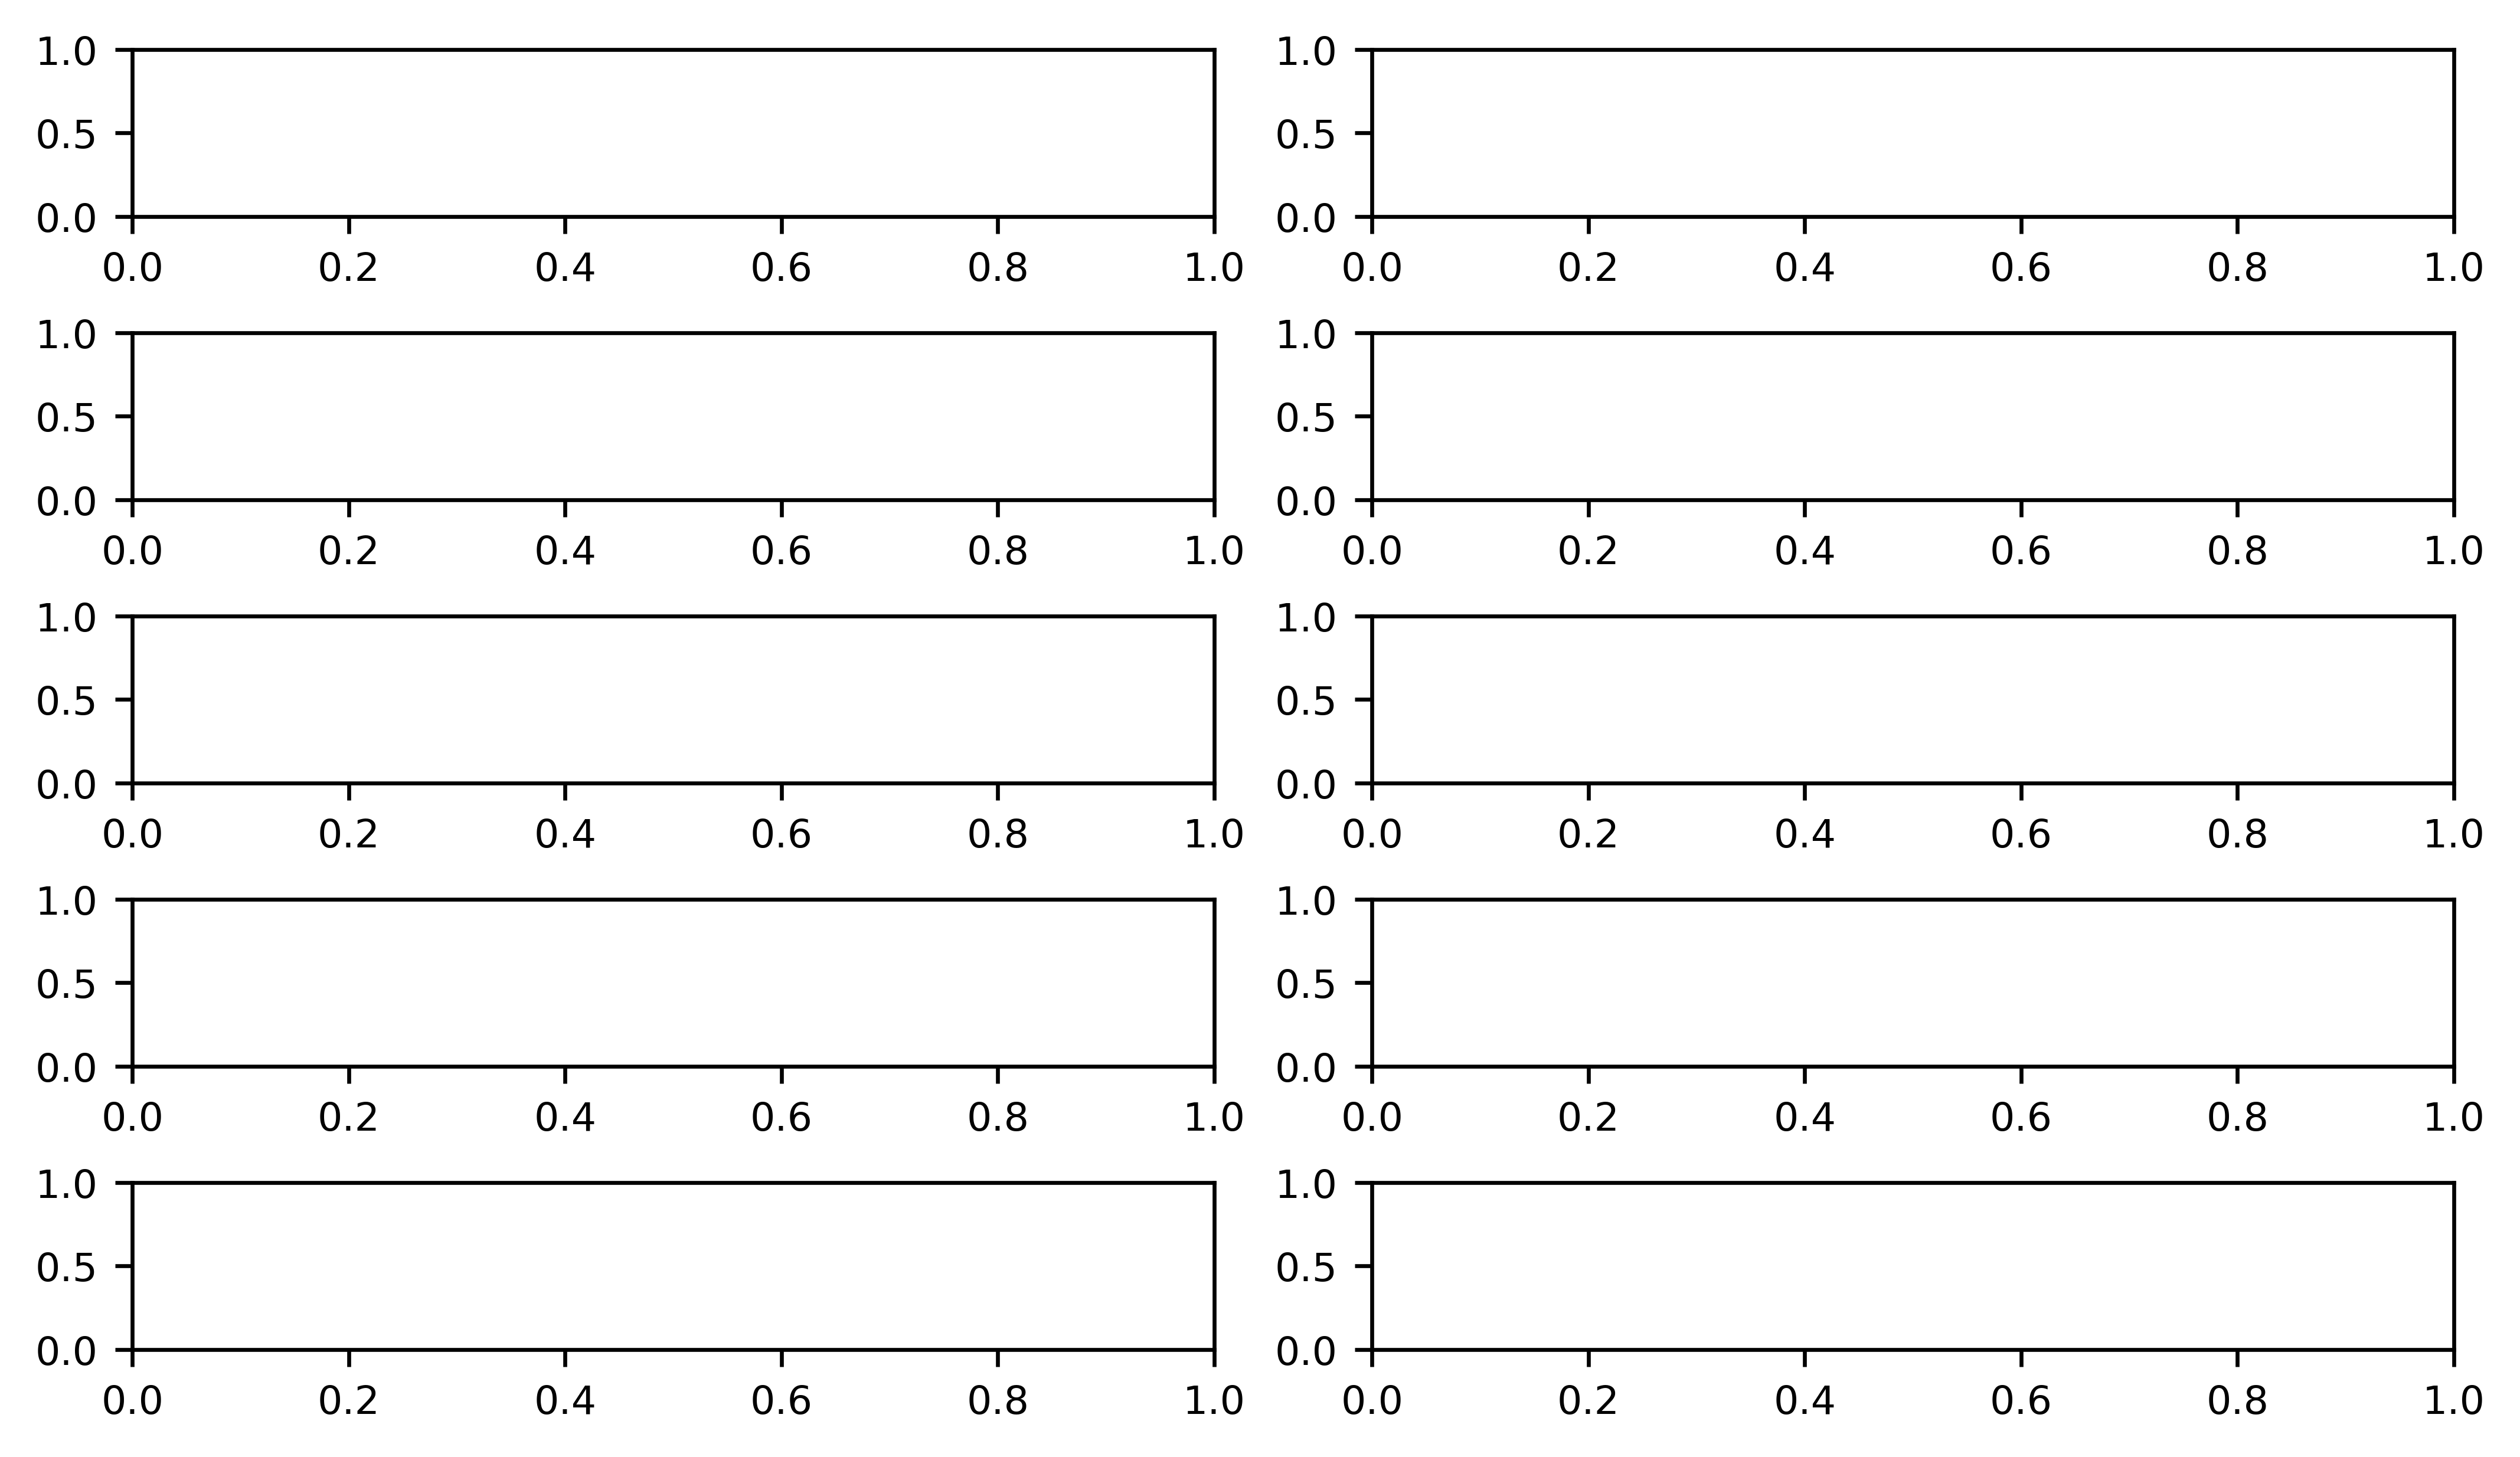

In [11]:
fig, axs = plt.subplots((num_branches+2),len(cell_ind_list),figsize=(7, 4),constrained_layout = True, dpi=600)
#########################################
for counter,cell_ind in enumerate(cell_ind_list):

    input_dir = os.path.join("results", exp_name,exp_aspect, sim_date, "data")
    cell_dir = os.path.join("results", exp_name,exp_aspect, sim_date, "data","cell_recording",f"cell_num_{cell_ind}")


#     #############################Input
    with open(f"{input_dir}/input.0.ras", 'r') as f:
        data_observed = f.read().splitlines(True)

    active_cell = []
    time_list=[]
    color_list = []
    assembely_colors_plotting = range(assembly_number)

    for component in data_observed[1:]:
            comps = component.split(' ')
            if float(comps[0]) >= cuttime and float(comps[0]) <= time_length:
                active_cell.append(int(comps[1]))
                color_list.append(assembely_colors_plotting[int(active_cell[-1]/assembly_size)])
                time_list.append(float(comps[0]))
    time_list = np.array(time_list)

    d1 = {'cell_num': active_cell , 'time(s)': time_list,'color':color_list}

    Activity_data_1 = pd.DataFrame(data=d1)


    color_palette = "muted"
    sns.scatterplot(ax=axs[0][counter],data=Activity_data_1, x="time(s)", y="cell_num",s = .5,hue = 'color', palette = color_palette,legend=False)
    axs[0][counter].set_xticks([])
    axs[0][counter].set_ylabel("CA3 cell index" )

    ########################## Branches
    for plot_ind in range(1,num_branches+1):

            with open(f'{cell_dir}/branch{plot_ind-1}.0.mem', 'r') as f:
                data_observed = f.read().splitlines(True)

            potential_stick = [] 
            obsevation_time = []
            for component in data_observed[1:]:
                    comps = component.split(' ')
                    if float(comps[0]) >= cuttime and float(comps[0]) <= time_length:
                        potential_stick.append(float(comps[1]))
                        obsevation_time.append(float(comps[0]))

            obsevation_time = np.array(obsevation_time)
            axs[plot_ind][counter].plot(obsevation_time,potential_stick,color="black")
    



    ######## AIS
    with open(f'{cell_dir}/soma.0.mem', 'r') as f:
        data_observed = f.read().splitlines(True)

    potential_stick = [] 
    obsevation_time = []
    for component in data_observed[1:]:
            comps = component.split(' ')
            if float(comps[0]) >= cuttime and float(comps[0]) <= time_length:
                potential_stick.append(float(comps[1]))
                obsevation_time.append(float(comps[0]))

    obsevation_time = np.array(obsevation_time)
    axs[num_branches+1][counter].plot(obsevation_time,potential_stick,label="AIS",color = 'green')   
        

    ##### setting titles
    if cell_ind < AcDcell_num:
        axs[0][counter].set_title("\nAcD Cell" )
    else:
        axs[0][counter].set_title("\nnonAcD Cell" )
        
    for i in range(5):
        ##### setting limits
        axs[i][counter].set_xlim(cuttime,time_length )
        if i == 0:
            axs[i][counter].set_ylim(0,CA3_size )
        else:
            axs[i][counter].set_ylim(-76,-19 )
        
        ##### setting ticks and labels
        if i == 4:
            axs[-1][counter].set_xticks(np.arange(cuttime,time_length+0.01,1))
            axs[-1][counter].set_xlabel("Time(s)")
        else:
            axs[i][counter].set_xticks([])
            axs[i][counter].set_xlabel('')
            
        if i == 0:
            axs[i][counter].set_yticks(np.arange(0,CA3_size+1,90))
            axs[i][0].set_ylabel("Input cell\nindex")
            axs[i][1].set_ylabel('')
        elif i < 4:
            axs[i][counter].set_yticks(np.arange(-75,-19,25))
            axs[i][0].set_ylabel(f'$V^b_{str(i)}$ (mV)')

        else:
            axs[i][counter].set_yticks(np.arange(-75,-19,25))
            axs[i][0].set_ylabel('$V^A$ (mV)')



## Ripple Phase

### Set the Result folder address

In [14]:
exp_name = 'rewiring_ex1'
exp_aspect = 'sleep_state'
simulation_date = "241115_134718"
trial_number = 0
sim_date = f"{simulation_date}/{trial_number}"
time_length = 5
cuttime = 0
### choose two cells to plot ( preferebly one from AcD and one from nonAcD group) 
cell_ind_list=[0,51]

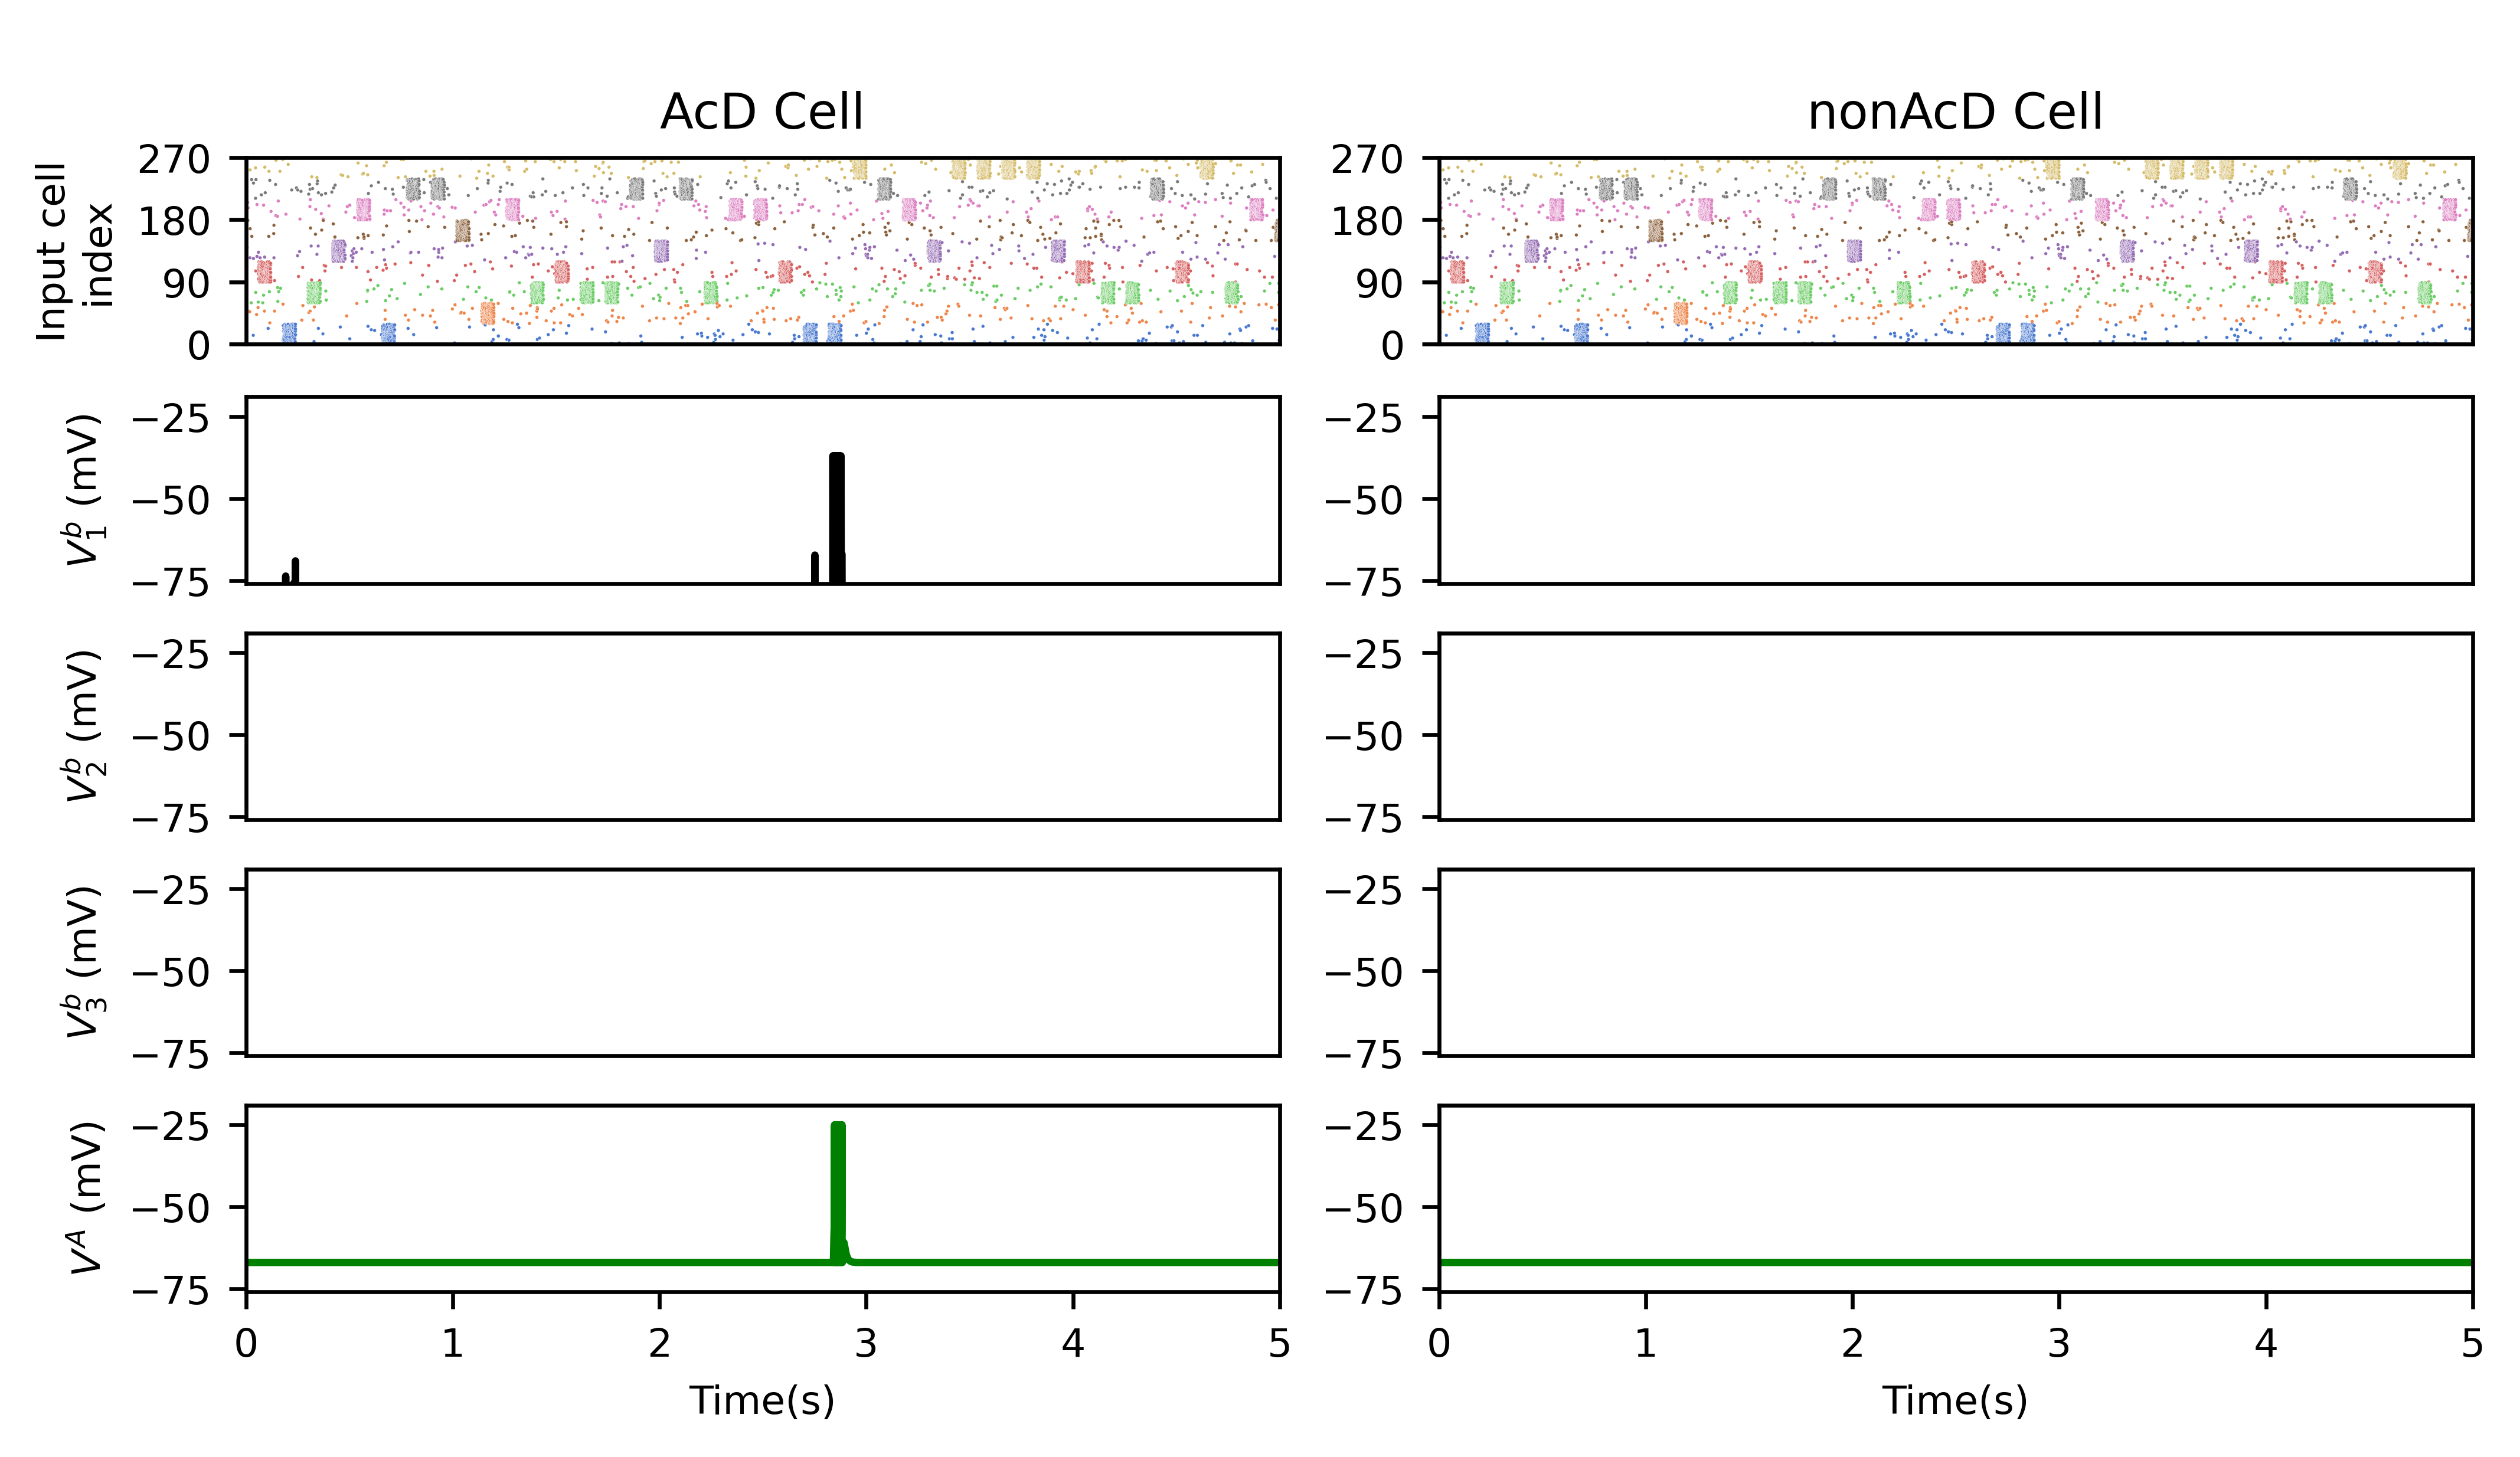

In [16]:
fig, axs = plt.subplots((num_branches+2),len(cell_ind_list),figsize=(7, 4),constrained_layout = True, dpi=600)
#########################################
for counter,cell_ind in enumerate(cell_ind_list):

    input_dir = os.path.join("results", exp_name,exp_aspect, sim_date, "data")
    cell_dir = os.path.join("results", exp_name,exp_aspect, sim_date, "data","cell_recording",f"cell_num_{cell_ind}")



#     #############################Input
    with open(f"{input_dir}/input_sleep.0.ras", 'r') as f:
        data_observed = f.read().splitlines(True)

    active_cell = []
    time_list=[]
    color_list = []
    assembely_colors_plotting = range(assembly_number)

    for component in data_observed[1:]:
            comps = component.split(' ')
            if float(comps[0]) >= cuttime and float(comps[0]) <= time_length:
                active_cell.append(int(comps[1]))
                color_list.append(assembely_colors_plotting[int(active_cell[-1]/assembly_size)])
                time_list.append(float(comps[0]))
    time_list = np.array(time_list)

    d1 = {'cell_num': active_cell , 'time(s)': time_list,'color':color_list}

    Activity_data_1 = pd.DataFrame(data=d1)


    color_palette = "muted"
    sns.scatterplot(ax=axs[0][counter],data=Activity_data_1, x="time(s)", y="cell_num",s = .5,hue = 'color', palette = color_palette,legend=False)
    axs[0][counter].set_xticks([])
    axs[0][counter].set_ylabel("CA3 cell index" )

    ########################## Branches
    for plot_ind in range(1,num_branches+1):

            with open(f'{cell_dir}/branch_sleep{plot_ind-1}.0.mem', 'r') as f:
                data_observed = f.read().splitlines(True)

            potential_stick = [] 
            obsevation_time = []
            for component in data_observed[1:]:
                    comps = component.split(' ')
                    if float(comps[0]) >= cuttime and float(comps[0]) <= time_length:
                        potential_stick.append(float(comps[1]))
                        obsevation_time.append(float(comps[0]))

            obsevation_time = np.array(obsevation_time)
            axs[plot_ind][counter].plot(obsevation_time,potential_stick,color="black")
    



    ######## AIS
    with open(f'{cell_dir}/soma_sleep.0.mem', 'r') as f:
        data_observed = f.read().splitlines(True)

    potential_stick = [] 
    obsevation_time = []
    for component in data_observed[1:]:
            comps = component.split(' ')
            if float(comps[0]) >= cuttime and float(comps[0]) <= time_length:
                potential_stick.append(float(comps[1]))
                obsevation_time.append(float(comps[0]))

    obsevation_time = np.array(obsevation_time)
    axs[num_branches+1][counter].plot(obsevation_time,potential_stick,label="AIS",color = 'green')   
        

    ##### setting titles
    if cell_ind < AcDcell_num:
        axs[0][counter].set_title("\nAcD Cell" )
    else:
        axs[0][counter].set_title("\nnonAcD Cell" )
        
    for i in range(5):
        ##### setting limits
        axs[i][counter].set_xlim(cuttime,time_length )
        if i == 0:
            axs[i][counter].set_ylim(0,CA3_size )
        else:
            axs[i][counter].set_ylim(-76,-19 )
        
        ##### setting ticks and labels
        if i == 4:
            axs[-1][counter].set_xticks(np.arange(cuttime,time_length+0.01,1))
            axs[-1][counter].set_xlabel("Time(s)")
        else:
            axs[i][counter].set_xticks([])
            axs[i][counter].set_xlabel('')
            
        if i == 0:
            axs[i][counter].set_yticks(np.arange(0,CA3_size+1,90))
            axs[i][0].set_ylabel("Input cell\nindex")
            axs[i][1].set_ylabel('')
        elif i < 4:
            axs[i][counter].set_yticks(np.arange(-75,-19,25))
            axs[i][0].set_ylabel(f'$V^b_{str(i)}$ (mV)')

        else:
            axs[i][counter].set_yticks(np.arange(-75,-19,25))
            axs[i][0].set_ylabel('$V^A$ (mV)')



# Weights and connections evolution

## Exploration Phase

### Set the Result folder address

In [34]:
exp_name = 'rewiring_ex1'
exp_aspect = 'wake_state'
simulation_date = "241114_183900"
trial_number = 0
sim_date = f"{simulation_date}/{trial_number}"

time_length = int(.8*1000)
cuttime = 0.99 * time_length

assembly_number = 9
assembly_size = 30
CA3_size = assembly_number*assembly_size
cell_num = 100
AcDcell_num = int(cell_num * 50/100)

### Choose a cell to plot weight evolutions
cell_ind= 0

if cell_ind < AcDcell_num:
    br_lim = [18,10,10]
else:
    br_lim = [10,10,10]

### Plot one cell results

Text(0.5, 1.0, 'N synaptic connections')

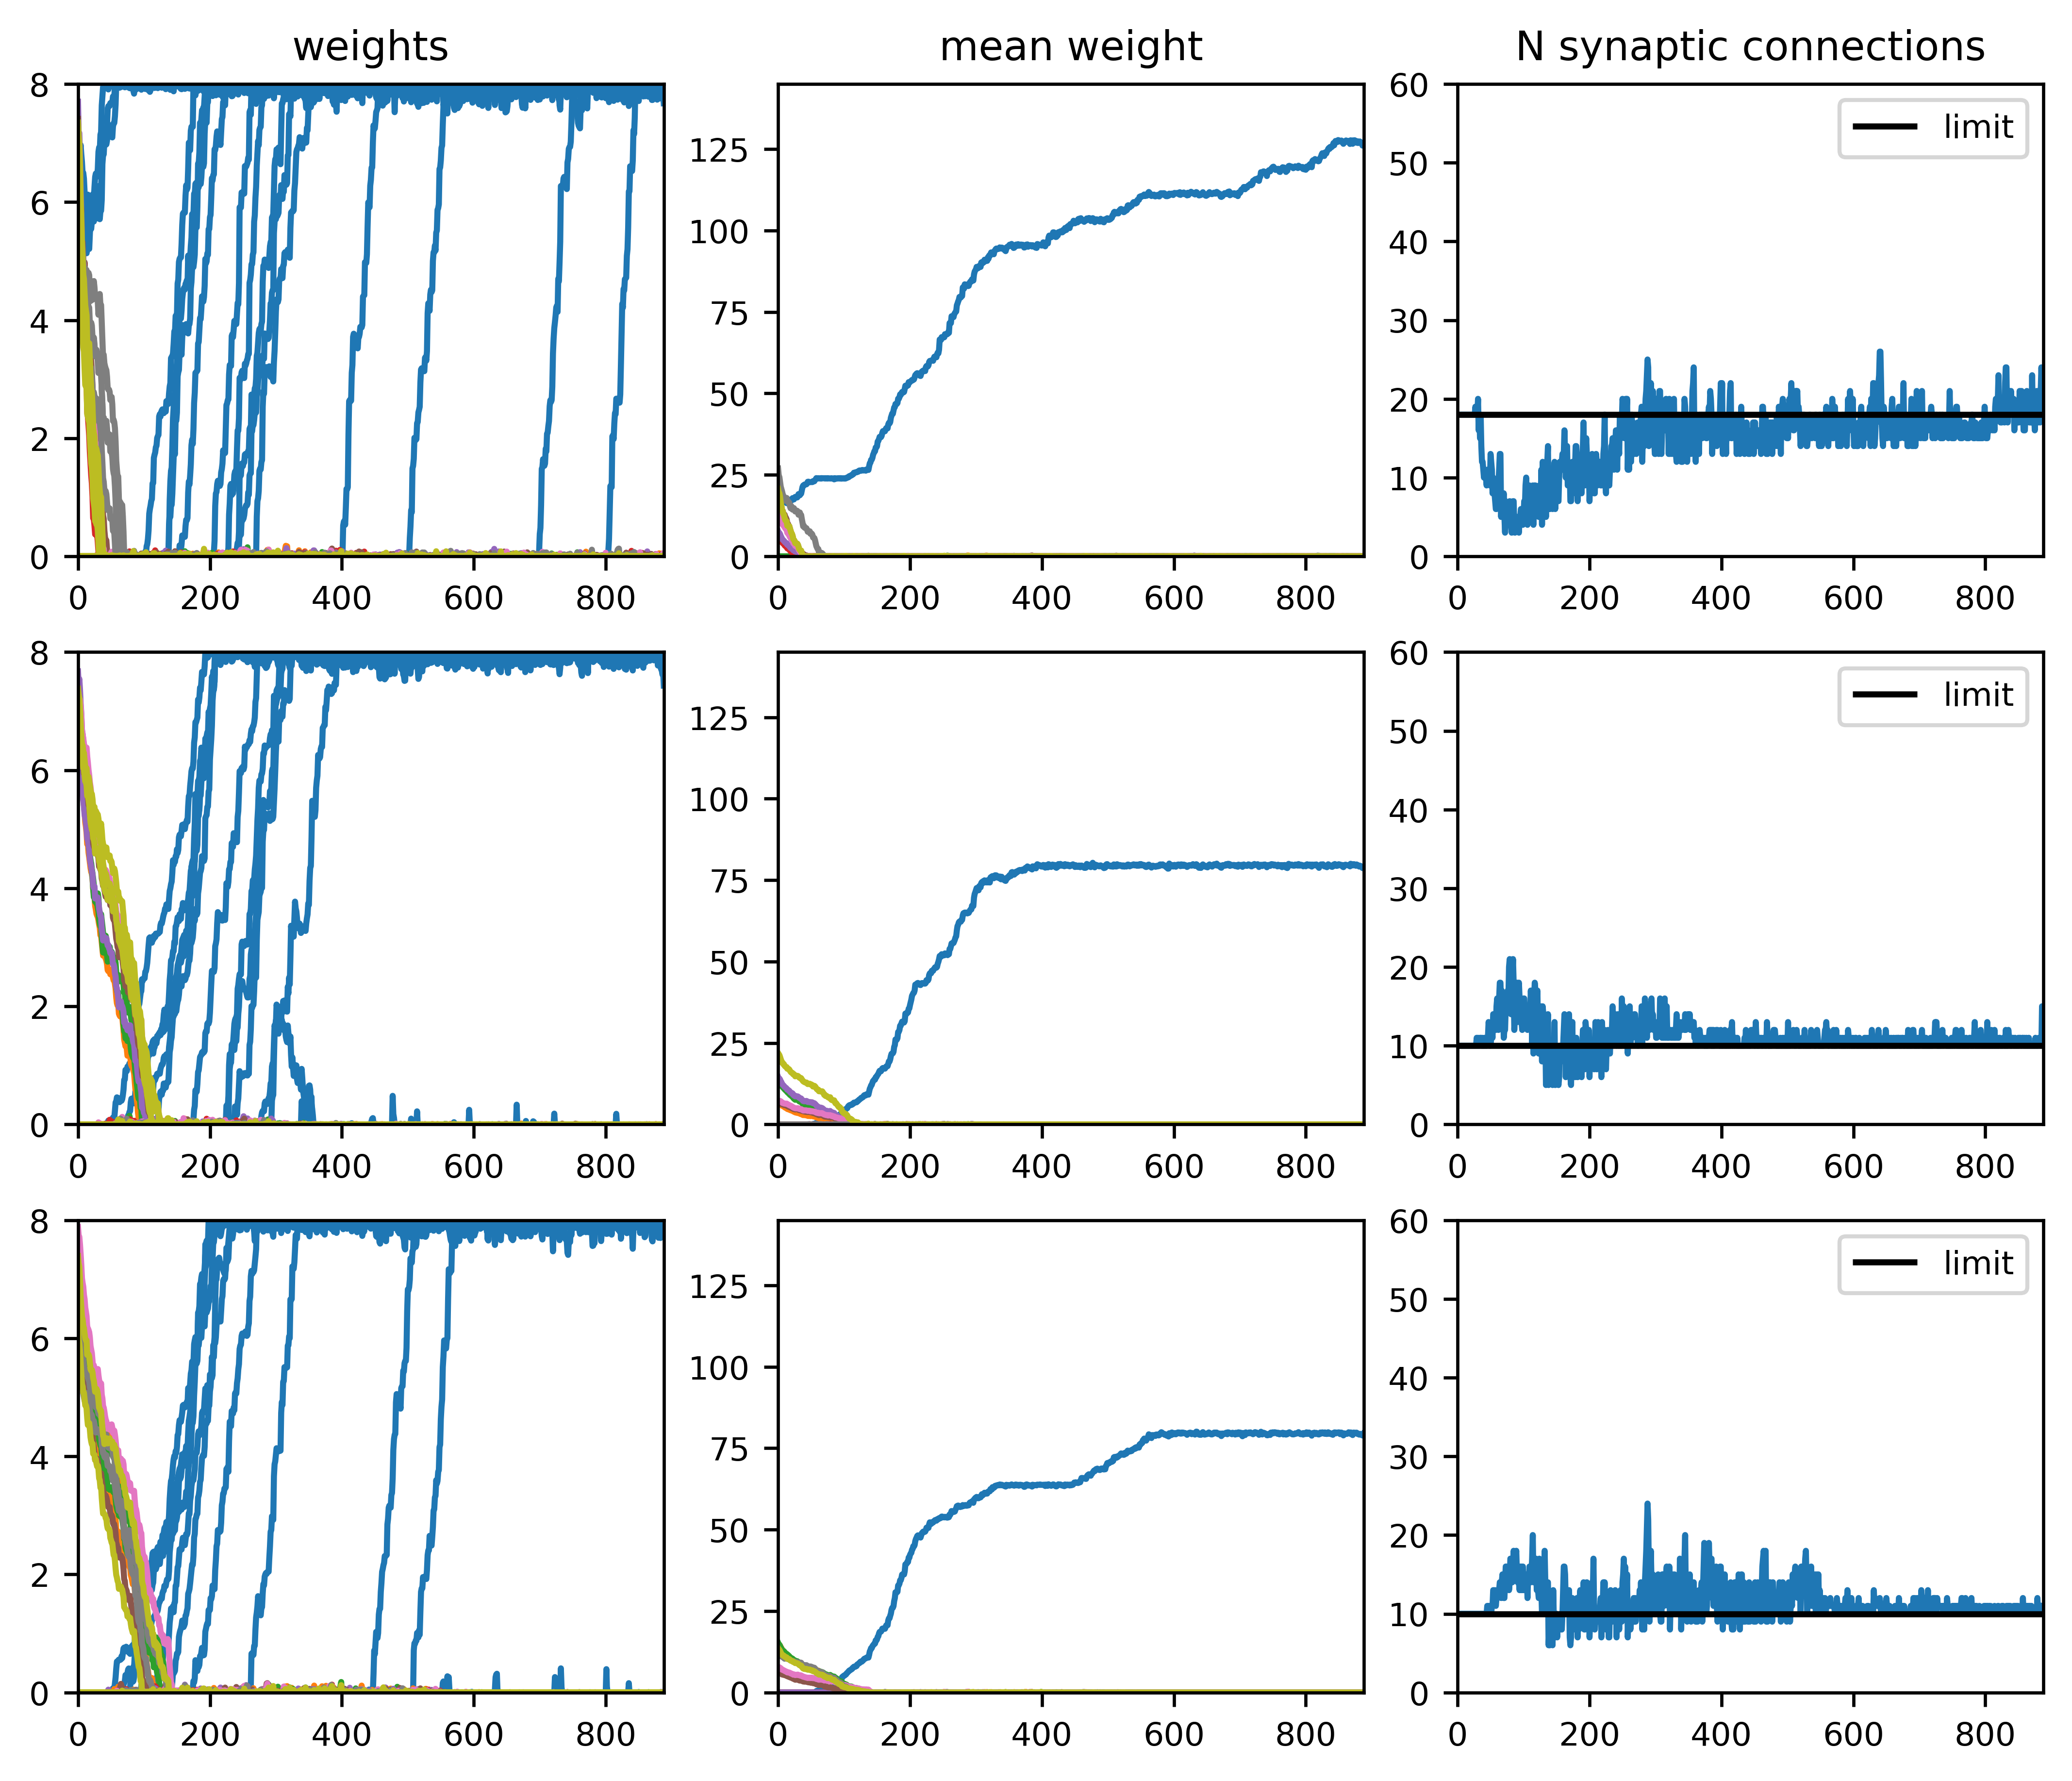

In [37]:
input_directory = os.path.join("results", exp_name,exp_aspect, sim_date, "data","cell_recording",f"cell_num_{cell_ind}")
   
with open(os.path.join(input_directory, "weights.0.dat"), "rb") as f:
        lines = f.readlines()
lines = lines[2:] 

time_series =np.arange(0,int(time_length / 0.3),3)
W_T_br = []
W_T = []
Nsyn_T= []
for q in time_series:
    weights_t = np.loadtxt(lines[(num_branches+1)*q +1:(num_branches+1)*(q+1)])
    W_T_br.append(weights_t)
    weight_br_assemb = np.zeros((num_branches,assembly_number))
    Nsyn_br_assemb = np.zeros((num_branches))
    for j in range(num_branches):
        for i in range(assembly_number):
            weight_br_assemb[j][i] = np.sum(weights_t[j][i * assembly_size:(i+1)*assembly_size])
        Nsyn_br_assemb[j] = len(np.where(weights_t[j] > 0)[0])
    W_T.append(weight_br_assemb)
    Nsyn_T.append(Nsyn_br_assemb)
W_T = np.array(W_T)
W_T_br = np.array(W_T_br)
Nsyn_T = np.array(Nsyn_T)
Nsyn_T = Nsyn_T.T

##########plotting########
fig, axs = plt.subplots(num_branches,3,figsize=(7,6),constrained_layout = True,dpi = 600)
color_palette = {0:'tab:blue',1:'tab:orange',2:'tab:green',
                 3:'tab:red',4:'tab:purple',5:'tab:brown',
                 6:'tab:pink',7:'tab:gray',8:'tab:olive'}

color_list = list(color_palette.values())

########### weights
for i in range(num_branches):
    for CA3_cell in range(CA3_size):
        axs[i][0].plot(time_series/3,W_T_br[:,i,CA3_cell],color = color_list[int(CA3_cell/assembly_size)])
    axs[i][0].set_ylim(0,8)
    axs[i][0].set_xlim(np.min(time_series/3),np.max(time_series/3))
    
    axs[i][1].set_ylim(0,145)
    axs[i][1].set_xlim(np.min(time_series/3),np.max(time_series/3))
    axs[i][1].plot(time_series/3,W_T[:,i,:])

    
    axs[i][2].plot(time_series/3,Nsyn_T[i,:])
    axs[i][2].hlines(br_lim[i],np.min(time_series/3),np.max(time_series/3),color = "black",label ="limit")


    axs[i][2].set_ylim(0,60)
    axs[i][2].set_xlim(np.min(time_series/3),np.max(time_series/3))
    axs[i][2].legend()
    
axs[0][0].set_title("weights")    
axs[0][1].set_title("mean weight")
axs[0][2].set_title("N synaptic connections")



### AcD vs. nonAcD cell

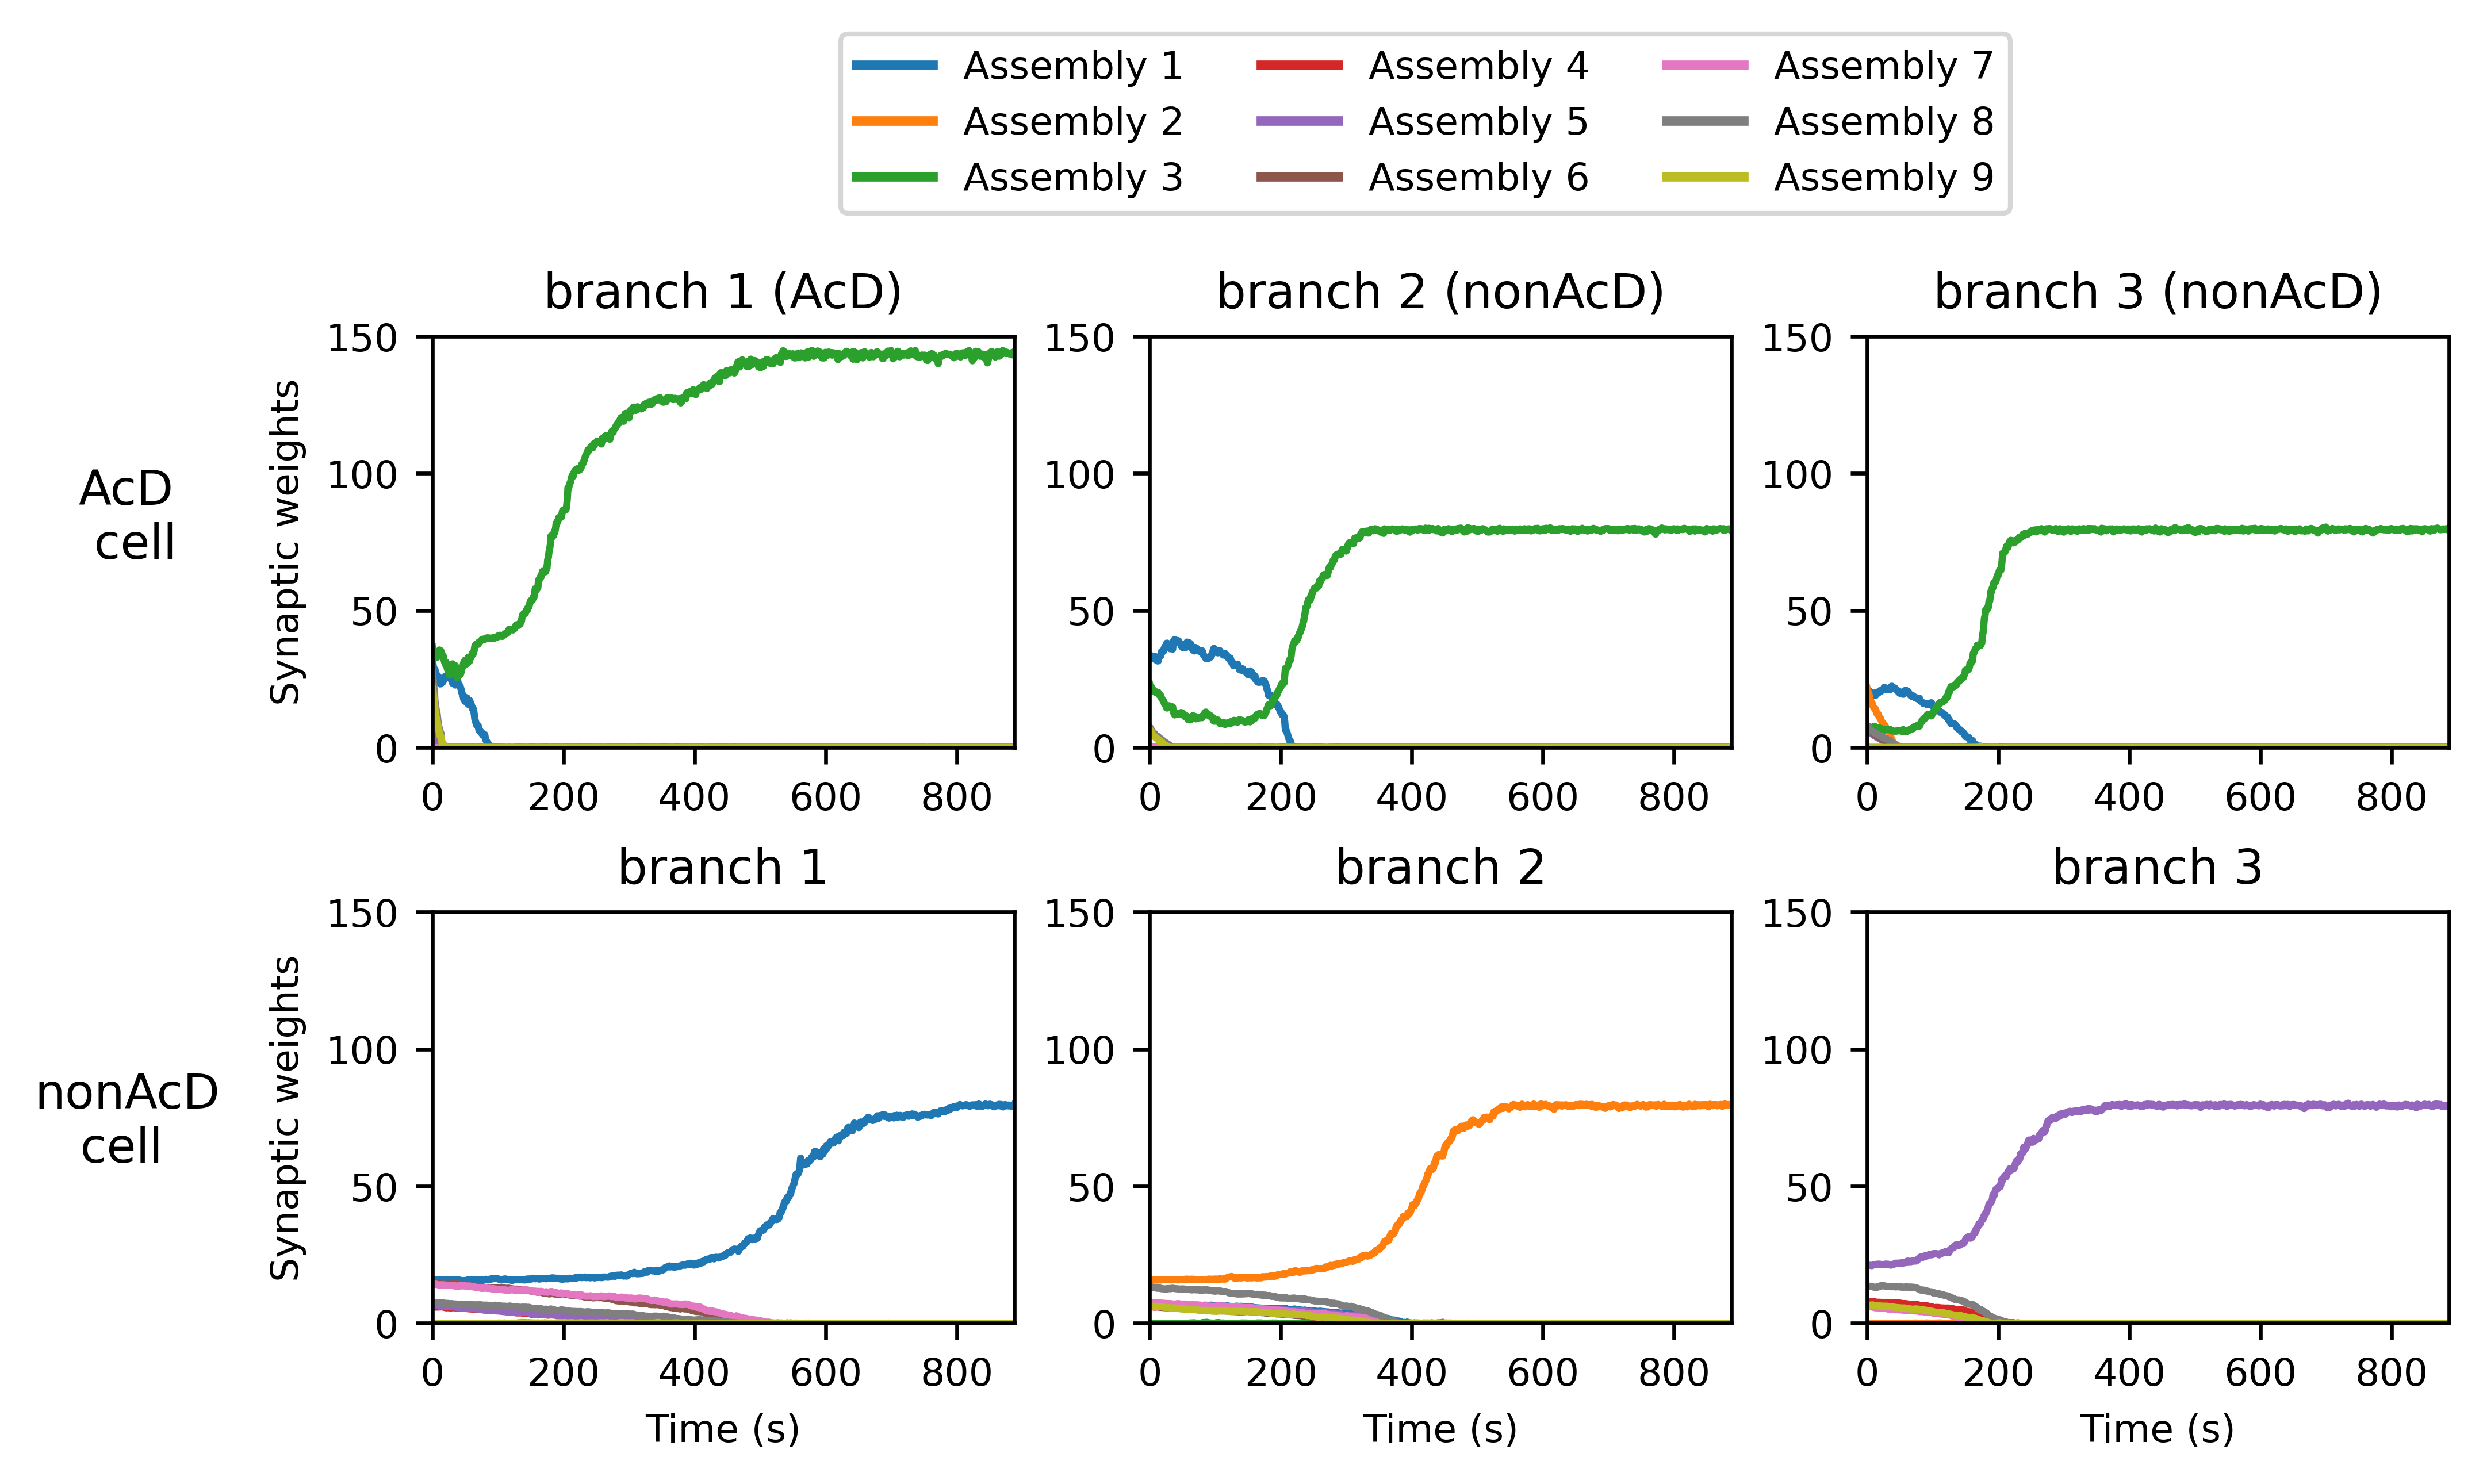

In [46]:
cell_list = np.array([1,55])

#########################################
fig, axs = plt.subplots(len(cell_list),num_branches,figsize=(6.4,3.5),constrained_layout = True,dpi=600)

for k in range(len(cell_list)):
    cell_ind = cell_list[k]
    if cell_ind < AcDcell_num:
        Title = "AcD"
    else:
        Title = "nonAcD"
    input_directory = os.path.join("results", exp_name,exp_aspect, sim_date, "data","cell_recording",f"cell_num_{cell_ind}")

    with open(os.path.join(input_directory, "weights.0.dat"), "rb") as f:
            lines = f.readlines()
    lines = lines[2:]

    time_series =np.arange(0,int(time_length / 0.3),3)

    W_T = []
    for q in time_series:
        weights_t = np.loadtxt(lines[(num_branches+1)*q +1:(num_branches+1)*(q+1)])
        weight_br_assemb = np.zeros((num_branches,assembly_number))
        for j in range(num_branches):
            for i in range(assembly_number):
                weight_br_assemb[j][i] = np.sum(weights_t[j][i * assembly_size:(i+1)*assembly_size])
        W_T.append(weight_br_assemb)
    W_T = np.array(W_T)



################################plotting########

    ########### weights
    for i in range(num_branches):
        axs[k][i].plot(time_series/3,W_T[:,i,:])
        axs[k][i].set_ylim(0,150)
        axs[k][i].set_xlim(0,np.max(time_series/3))
        axs[1][i].set_xlabel('Time (s)')
    
axs[0][0].set_title("branch 1 (AcD)")
axs[0][1].set_title("branch 2 (nonAcD)")
axs[0][2].set_title("branch 3 (nonAcD)")
axs[1][0].set_title("branch 1")
axs[1][1].set_title("branch 2")
axs[1][2].set_title("branch 3")



axs[1][0].set_ylabel("Synaptic weights")
axs[0][0].set_ylabel("Synaptic weights")
fig.text(-0.08,0.75,"AcD\n cell",fontsize = plt.rcParams['axes.titlesize'])
fig.text(-0.1,0.25,"nonAcD\n   cell",fontsize = plt.rcParams['axes.titlesize'])


labels = [f'Assembly {i+1}' for i in range(9)]
handles = [Line2D([0], [0], color=plt.cm.tab10.colors[i], lw=2) for i in range(9)]
fig.legend(loc='upper center', bbox_to_anchor=(0.53, 1.20),handles=handles, labels=labels,ncol = 3)
plt.savefig("SIMA_WAKE.svg", format="svg")

## Ripple Phase

### Set the Result folder address

In [27]:
exp_name = 'rewiring_ex1'
exp_aspect = 'sleep_state_check'
simulation_date = "241119_092653"
trial_number = 0
sim_date = f"{simulation_date}/{trial_number}"

time_length = int(0.95*3000)
cuttime = 0.6 * time_length

assembly_number = 9
assembly_size = 30
CA3_size = assembly_number*assembly_size
cell_num = 100
AcDcell_num = int(cell_num * 50/100)

### Choose two cells to plot weight evolutions
cell_list = np.array([2,5])

AcD_conn_num = np.array([18,10,10])
nonAcD_conn_num = np.array([10,10,10])

### AcD vs. nonAcD

FileNotFoundError: [Errno 2] No such file or directory: 'results/rewiring_ex1/sleep_state_check/241119_092653/0/data/cell_recording/cell_num_2/weights_sleep.0.dat'

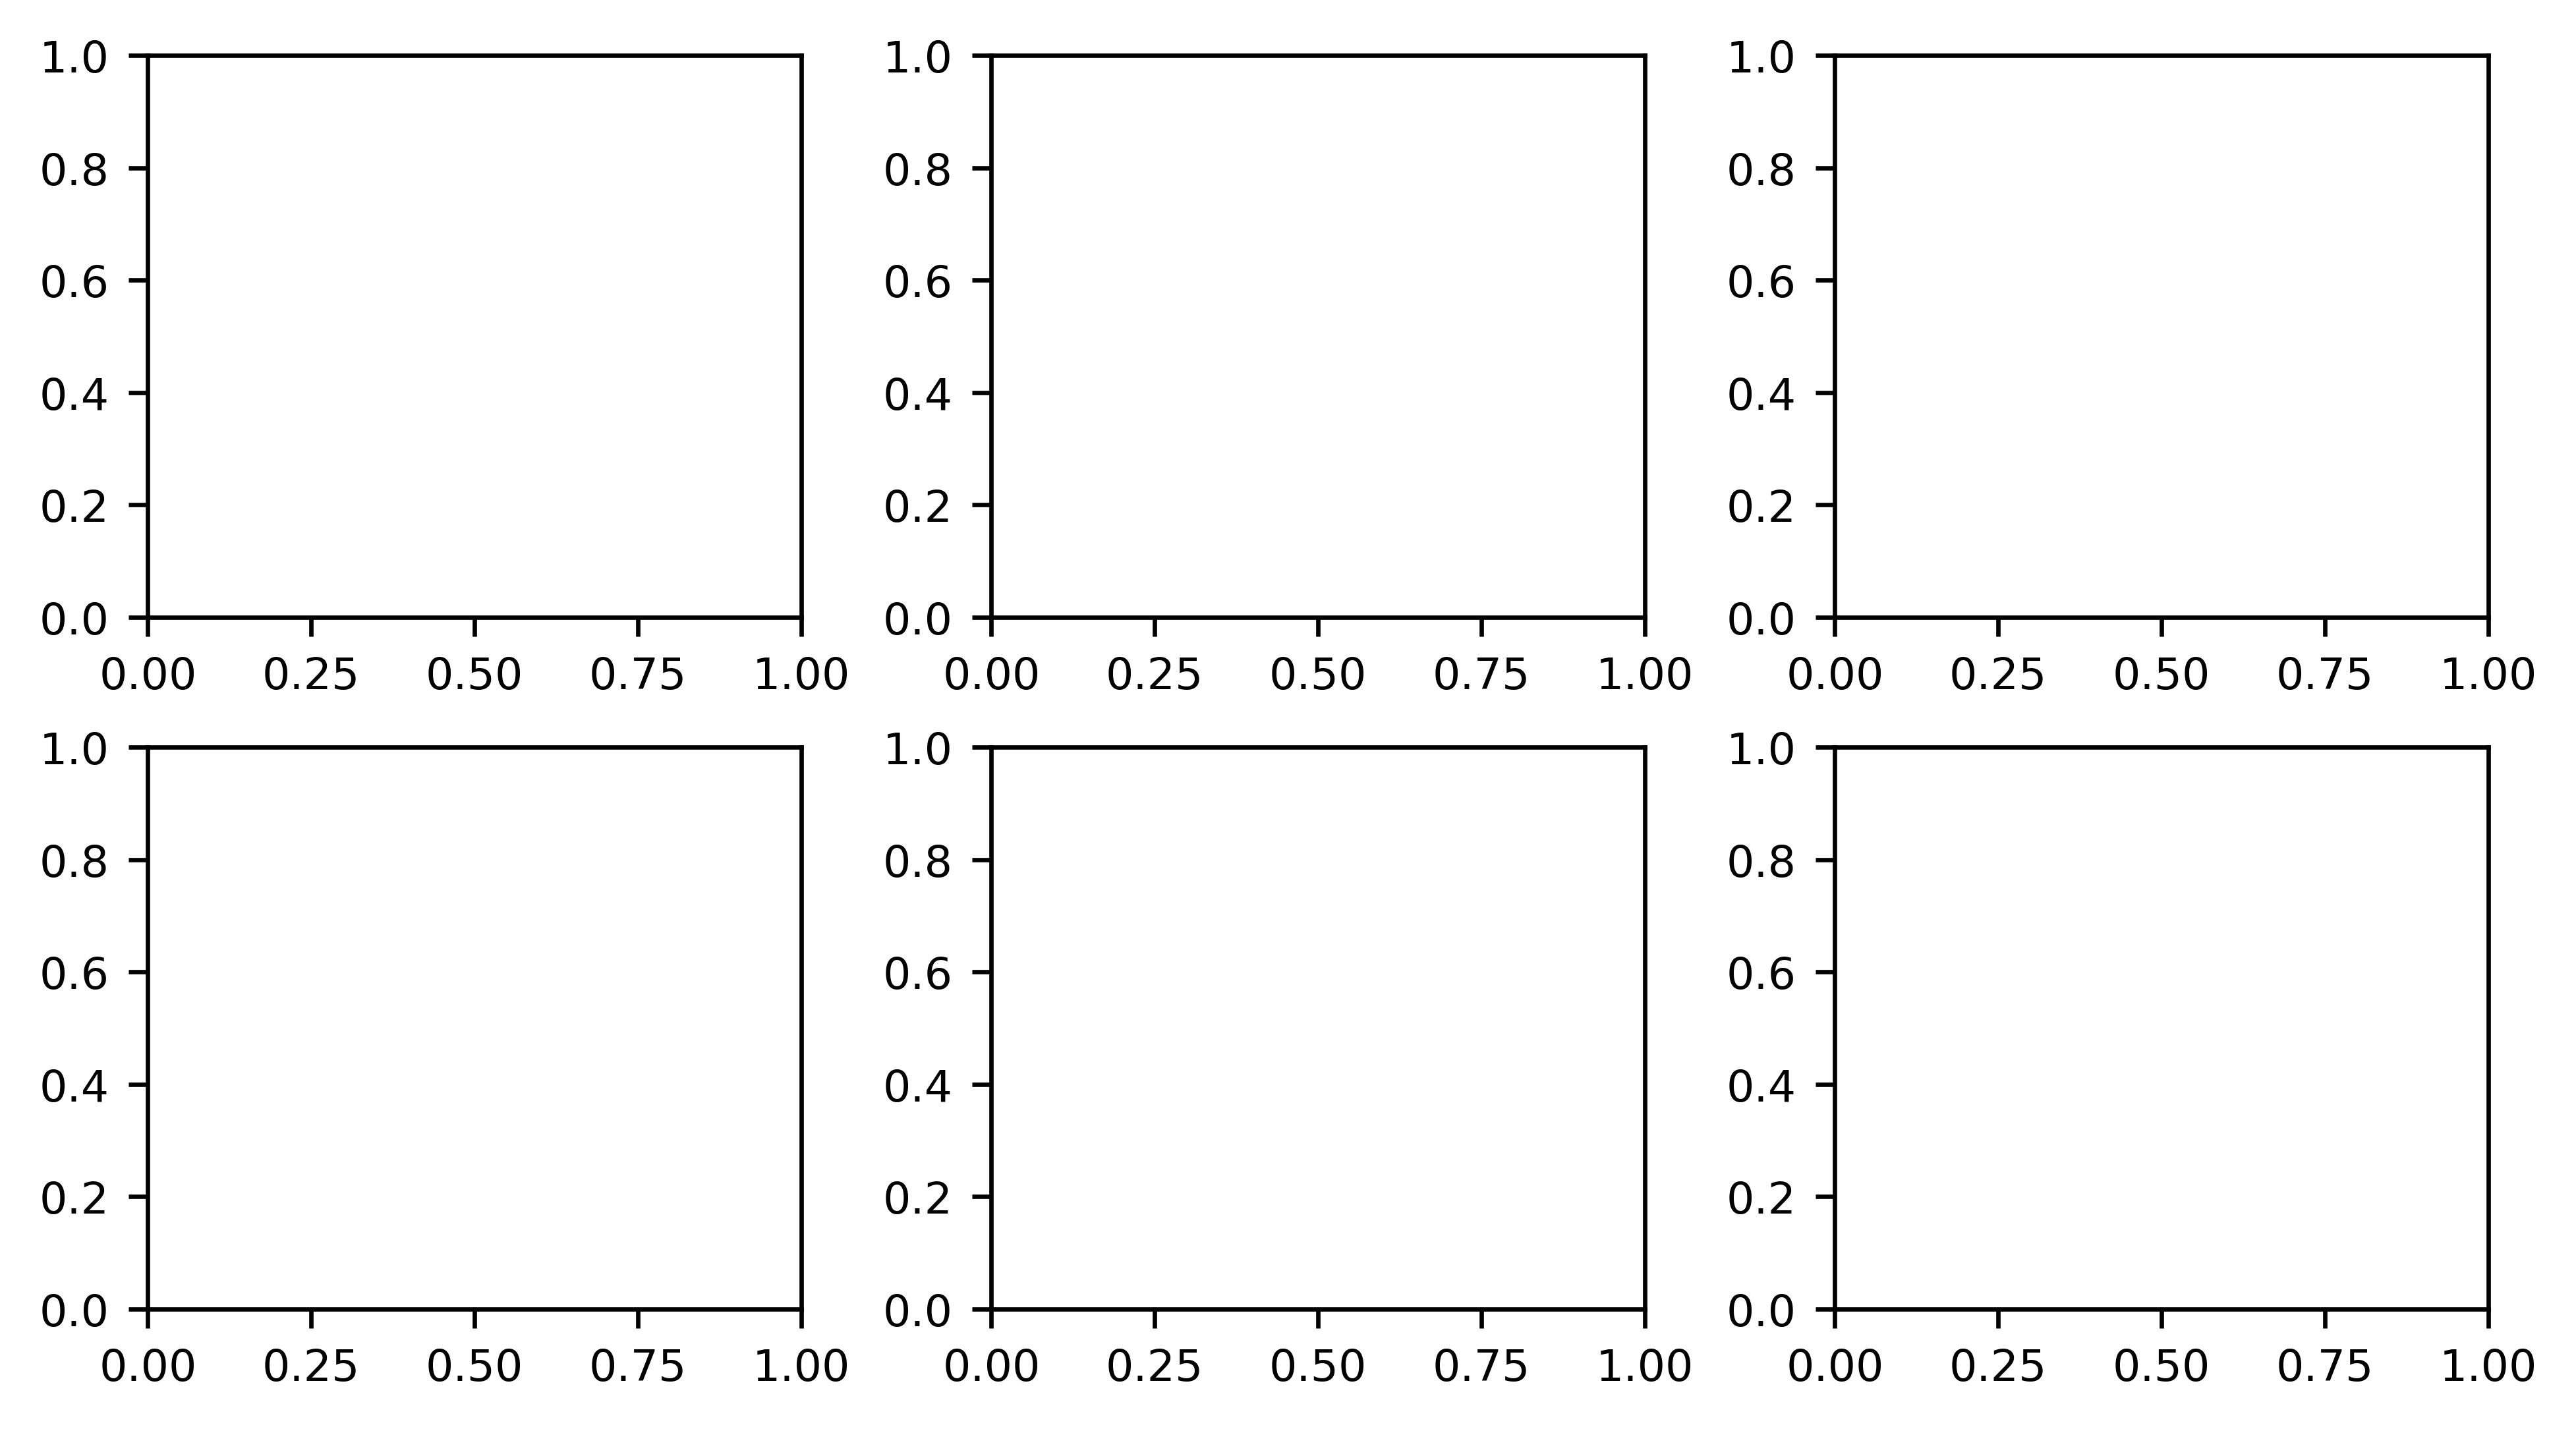

In [30]:
fig, axs = plt.subplots(len(cell_list),num_branches,figsize=(6.4,3.5),constrained_layout = True,dpi=600)

for k in range(len(cell_list)):
    cell_ind = cell_list[k]
    if cell_ind < AcDcell_num:
        Title = "AcD"
        limit_w = 8 * AcD_conn_num
    else:
        Title = "nonAcD"
        limit_w = 8 * nonAcD_conn_num
    input_directory = os.path.join("results", exp_name,exp_aspect, sim_date, "data","cell_recording",f"cell_num_{cell_ind}")

    with open(os.path.join(input_directory, "weights_sleep.0.dat"), "rb") as f:
            lines = f.readlines()
    lines = lines[2:]

    time_series =np.arange(0,int(time_length / 0.3),3)

    W_T = []
    for q in time_series:
        weights_t = np.loadtxt(lines[(num_branches+1)*q +1:(num_branches+1)*(q+1)])
        weight_br_assemb = np.zeros((num_branches,assembly_number))
        for j in range(num_branches):
            for i in range(assembly_number):
                weight_br_assemb[j][i] = np.sum(weights_t[j][i * assembly_size:(i+1)*assembly_size])
        W_T.append(weight_br_assemb)
    W_T = np.array(W_T)




#####################################plotting########

#     ########### weights
    for i in range(num_branches):
        axs[k][i].plot(time_series/3,W_T[:,i,:])
        axs[k][i].hlines(limit_w[i],0,np.max(time_series/3),color = "black",linestyle='--',label="maximum W limit",alpha = 0.3)
        axs[k][i].set_ylim(0,150)
        axs[k][i].set_xlim(0,np.max(time_series/3))
        axs[1][i].set_xlabel('Time (s)')
    
axs[0][0].set_title("branch 1 (AcD)")
axs[0][1].set_title("branch 2 (nonAcD)")
axs[0][2].set_title("branch 3 (nonAcD)")
axs[1][0].set_title("branch 1")
axs[1][1].set_title("branch 2")
axs[1][2].set_title("branch 3")

# axs[1][0].text(-480,65,"nonAcD\n   cell",fontsize = plt.rcParams['axes.titlesize'])


axs[1][0].set_ylabel("Synaptic weights")
axs[0][0].set_ylabel("Synaptic weights")
fig.text(-0.08,0.75,"AcD\n cell",fontsize = plt.rcParams['axes.titlesize'])
fig.text(-0.08,0.25,"nonAcD\n   cell",fontsize = plt.rcParams['axes.titlesize'])


labels = [f'Assembly {i+1}' for i in range(9)]
handles = [Line2D([0], [0], color=plt.cm.tab10.colors[i], lw=2) for i in range(9)]
fig.legend(loc='upper center', bbox_to_anchor=(0.53, 1.20),handles=handles, labels=labels,ncol = 3)